# Question: factors causes hotel reservation cancellation 

Data records hotel room reservation on 2017 and 2018

# Import data, overview

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
hr= pd.read_csv(r'hotelReservation.csv')
hr.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [3]:
hr.shape

(36275, 19)

In [4]:
hr.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [5]:
hr.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


delete less related factors, selected more related factors

In [6]:
hr=hr[['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights','room_type_reserved','avg_price_per_room', 'no_of_special_requests', 'booking_status']]

In [7]:
hr.sample()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,room_type_reserved,avg_price_per_room,no_of_special_requests,booking_status
34934,3,0,2,2,Room_Type 4,146.7,0,Canceled


In [8]:
# data no missing value
hr.isna().sum()

no_of_adults              0
no_of_children            0
no_of_weekend_nights      0
no_of_week_nights         0
room_type_reserved        0
avg_price_per_room        0
no_of_special_requests    0
booking_status            0
dtype: int64

In [9]:
hr.dtypes

no_of_adults                int64
no_of_children              int64
no_of_weekend_nights        int64
no_of_week_nights           int64
room_type_reserved         object
avg_price_per_room        float64
no_of_special_requests      int64
booking_status             object
dtype: object

# Change str value into numeric value

In [10]:
hr['booking_status'].value_counts()

Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64

In [11]:
#set booking_status: not_canceled as 0, cancelled as 1
hr['booking_status'] = hr['booking_status'].replace(['Not_Canceled','Canceled'], [0,1])


In [12]:
hr['booking_status'].value_counts()

0    24390
1    11885
Name: booking_status, dtype: int64

# Set dummy variable by number of room sold decending order

In [13]:
hr['room_type_reserved'].value_counts()

Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64

In [14]:
#dummy variable label order based on NO.room sold
hr['room_type_reserved']= hr['room_type_reserved'].replace(['Room_Type 1','Room_Type 4','Room_Type 6','Room_Type 2','Room_Type 5','Room_Type 7','Room_Type 3'],[1,2,3,4,5,6,7])
hr['room_type_reserved'].value_counts()

1    28130
2     6057
3      966
4      692
5      265
6      158
7        7
Name: room_type_reserved, dtype: int64

In [15]:
#each room type avg_sold_price
hr.groupby(hr['room_type_reserved'])['avg_price_per_room'].mean().sort_values()

room_type_reserved
7     73.678571
4     87.848555
1     95.918532
5    123.733623
2    125.287317
6    155.198291
3    182.212836
Name: avg_price_per_room, dtype: float64

In [16]:
#add additional total nights and no_guests columns in dataset
hr['nights']=hr['no_of_weekend_nights']+hr['no_of_week_nights']
hr['people']=hr['no_of_adults']+hr['no_of_children']

In [17]:
hr.shape

(36275, 10)

In [18]:
hr.corr()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,room_type_reserved,avg_price_per_room,no_of_special_requests,booking_status,nights,people
no_of_adults,1.000000,-0.019787,0.103316,0.105622,0.143541,0.296886,0.189401,0.086920,0.133803,0.785371
no_of_children,-0.019787,1.000000,0.029478,0.024398,0.383411,0.337728,0.124486,0.033078,0.033644,0.603365
no_of_weekend_nights,0.103316,0.029478,1.000000,0.179577,0.042310,-0.004525,0.060593,0.061563,0.629339,0.100658
no_of_week_nights,0.105622,0.024398,0.179577,1.000000,0.063633,0.022753,0.045994,0.092996,0.877513,0.099352
room_type_reserved,0.143541,0.383411,0.042310,0.063633,1.000000,0.326440,0.109385,0.009922,0.070894,0.351879
avg_price_per_room,0.296886,0.337728,-0.004525,0.022753,0.326440,1.000000,0.184381,0.142569,0.015768,0.445906
no_of_special_requests,0.189401,0.124486,0.060593,0.045994,0.109385,0.184381,1.000000,-0.253070,0.065871,0.228146
booking_status,0.086920,0.033078,0.061563,0.092996,0.009922,0.142569,-0.253070,1.000000,0.103475,0.089810
nights,0.133803,0.033644,0.629339,0.877513,0.070894,0.015768,0.065871,0.103475,1.000000,0.127554
people,0.785371,0.603365,0.100658,0.099352,0.351879,0.445906,0.228146,0.089810,0.127554,1.000000


# Delete No.children=9& 10 (3 pieces of data), have childen&no adult (139 pieces of data), booking night record=0 (78 pieces of data) and avg_room_price=0 (541 pieces of data).

In [19]:
hr['no_of_children'].value_counts()

0     33577
1      1618
2      1058
3        19
9         2
10        1
Name: no_of_children, dtype: int64

In [20]:
hr[hr['no_of_adults']==0]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,room_type_reserved,avg_price_per_room,no_of_special_requests,booking_status,nights,people
32,0,2,0,3,4,82.44,1,0,3,2
287,0,2,2,2,1,108.38,1,1,4,2
653,0,2,1,2,4,115.68,1,0,3,2
937,0,2,0,3,4,6.67,1,0,3,2
954,0,2,1,1,4,81.50,2,0,2,2
...,...,...,...,...,...,...,...,...,...,...
34720,0,2,0,3,4,127.38,3,0,3,2
34730,0,2,1,1,4,88.77,0,1,2,2
34890,0,2,2,2,4,124.25,2,0,4,2
35691,0,2,2,1,4,78.00,0,1,3,2


In [21]:
hr[hr['nights']==0]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,room_type_reserved,avg_price_per_room,no_of_special_requests,booking_status,nights,people
209,1,0,0,0,1,0.0,1,0,0,1
1158,2,0,0,0,1,0.0,1,0,0,2
1403,3,0,0,0,2,0.0,2,0,0,3
1907,2,0,0,0,1,0.0,1,0,0,2
1986,2,0,0,0,1,0.0,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...
33218,1,0,0,0,1,0.0,0,0,0,1
33537,2,0,0,0,4,0.0,2,0,0,2
34750,1,0,0,0,2,0.0,0,0,0,1
35472,1,0,0,0,1,0.0,0,0,0,1


In [22]:
hr[hr['avg_price_per_room']==0]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,room_type_reserved,avg_price_per_room,no_of_special_requests,booking_status,nights,people
63,1,0,0,1,1,0.0,1,0,1,1
145,1,0,0,2,1,0.0,1,0,2,1
209,1,0,0,0,1,0.0,1,0,0,1
266,1,0,0,2,1,0.0,1,0,2,1
267,1,0,2,1,1,0.0,1,0,3,1
...,...,...,...,...,...,...,...,...,...,...
35983,1,0,0,1,6,0.0,1,0,1,1
36080,1,0,1,1,6,0.0,1,0,2,1
36114,1,0,0,1,1,0.0,0,0,1,1
36217,2,0,2,1,4,0.0,2,0,3,2


In [23]:
hr=hr[hr['no_of_children']<=3]
hr=hr[hr['no_of_adults']!=0]
hr=hr[hr['nights']!=0]
hr=hr[hr['avg_price_per_room']!=0]

In [24]:
hr.shape

(35592, 10)

In [25]:
#total_nights--cancellation and total_guests-- cancellation correlation are higher than week/weekend, adult/children 
hr.corr()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,room_type_reserved,avg_price_per_room,no_of_special_requests,booking_status,nights,people
no_of_adults,1.000000,0.048765,0.103048,0.105110,0.209380,0.284841,0.202157,0.082482,0.133577,0.811993
no_of_children,0.048765,1.000000,0.028541,0.022810,0.357980,0.405274,0.124745,0.036248,0.032010,0.622569
no_of_weekend_nights,0.103048,0.028541,1.000000,0.173889,0.050355,-0.034738,0.063062,0.055703,0.626745,0.097416
no_of_week_nights,0.105110,0.022810,0.173889,1.000000,0.075898,-0.011027,0.050078,0.085651,0.876337,0.095682
room_type_reserved,0.209380,0.357980,0.050355,0.075898,1.000000,0.415439,0.097826,0.018108,0.084687,0.373238
avg_price_per_room,0.284841,0.405274,-0.034738,-0.011027,0.415439,1.000000,0.210470,0.121158,-0.025717,0.459998
no_of_special_requests,0.202157,0.124745,0.063062,0.050078,0.097826,0.210470,1.000000,-0.254290,0.070472,0.231286
booking_status,0.082482,0.036248,0.055703,0.085651,0.018108,0.121158,-0.254290,1.000000,0.095021,0.085806
nights,0.133577,0.032010,0.626745,0.876337,0.084687,-0.025717,0.070472,0.095021,1.000000,0.123363
people,0.811993,0.622569,0.097416,0.095682,0.373238,0.459998,0.231286,0.085806,0.123363,1.000000


#standarlise data 

In [26]:
#Set variable and target
X=hr.iloc[:,:-3]
y=hr['booking_status']

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2, random_state=20)

Compare svm and LogisticRegression

In [30]:
#logistic regression is better than svm in this model
from sklearn.linear_model import LogisticRegression
lor= LogisticRegression(max_iter=100000).fit(X_train,y_train)
(lor.predict(X_train)==y_train).value_counts()

True     20160
False     8313
Name: booking_status, dtype: int64

In [31]:
lor.coef_

array([[ 0.2179249 ,  0.01262844,  0.14823951,  0.2118134 , -0.15491326,
         0.45240746, -0.86063194]])

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(lor.predict(X_test),y_test)


0.7123191459474645

In [33]:
#Logistic model has 71.2% accuracy to predict cancellation status

In [34]:
from sklearn.model_selection import cross_val_score
cross_val_score(lor, X_test, y_test, cv=5)

array([0.70856742, 0.7127809 , 0.7008427 , 0.70926966, 0.68728039])

In [35]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, lor.predict(X_test), pos_label=1)

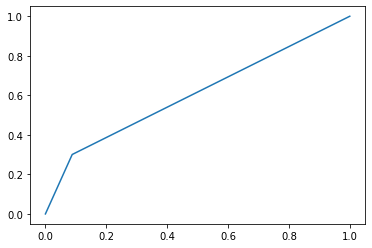

In [36]:
plt.plot(fpr,tpr)

In [37]:
hr.corr()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,room_type_reserved,avg_price_per_room,no_of_special_requests,booking_status,nights,people
no_of_adults,1.000000,0.048765,0.103048,0.105110,0.209380,0.284841,0.202157,0.082482,0.133577,0.811993
no_of_children,0.048765,1.000000,0.028541,0.022810,0.357980,0.405274,0.124745,0.036248,0.032010,0.622569
no_of_weekend_nights,0.103048,0.028541,1.000000,0.173889,0.050355,-0.034738,0.063062,0.055703,0.626745,0.097416
no_of_week_nights,0.105110,0.022810,0.173889,1.000000,0.075898,-0.011027,0.050078,0.085651,0.876337,0.095682
room_type_reserved,0.209380,0.357980,0.050355,0.075898,1.000000,0.415439,0.097826,0.018108,0.084687,0.373238
avg_price_per_room,0.284841,0.405274,-0.034738,-0.011027,0.415439,1.000000,0.210470,0.121158,-0.025717,0.459998
no_of_special_requests,0.202157,0.124745,0.063062,0.050078,0.097826,0.210470,1.000000,-0.254290,0.070472,0.231286
booking_status,0.082482,0.036248,0.055703,0.085651,0.018108,0.121158,-0.254290,1.000000,0.095021,0.085806
nights,0.133577,0.032010,0.626745,0.876337,0.084687,-0.025717,0.070472,0.095021,1.000000,0.123363
people,0.811993,0.622569,0.097416,0.095682,0.373238,0.459998,0.231286,0.085806,0.123363,1.000000


In [38]:
X1=hr[['nights','people','room_type_reserved','avg_price_per_room','no_of_special_requests']]
y=hr['booking_status']

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X1 = scaler.fit_transform(X1)
from sklearn.model_selection import train_test_split
X1_train,X1_test,y_train,y_test= train_test_split(X1,y,test_size=0.2, random_state=20)
from sklearn.linear_model import LogisticRegression
lorr= LogisticRegression(max_iter=100000).fit(X1_train,y_train)
lorr.predict(X1_train)
(lorr.predict(X1_train)==y_train).sum()
accuracy_score(lorr.predict(X1_test),y_test)

0.710212108442197

In [40]:
lorr.coef_

array([[ 0.28373208,  0.19986807, -0.17379033,  0.43251615, -0.85278452]])

In [41]:
#Grid_search find a suitable model for the data
from sklearn.model_selection import GridSearchCV
loro = LogisticRegression(max_iter=1000000)
parameters1 = {"C": [1, 10, 100],
              "solver": ['lbfgs', 'liblinear', 'newton-cg','sag','saga'], 
             }
grid = GridSearchCV(estimator=loro, param_grid = parameters1, cv = 4)
grid.fit(X1_train, y_train)
grid.score(X1_test,y_test)

0.710212108442197

In [42]:
grid.best_params_

{'C': 1, 'solver': 'lbfgs'}

using best params to predict cancellation

In [43]:
lor_c=LogisticRegression(C=1, solver='lbfgs',max_iter=1000000).fit(X1_train, y_train)
accuracy_score(lor_c.predict(X1_test),y_test)

0.710212108442197

In [44]:
from sklearn.model_selection import cross_val_score
cross_val_score(lor_c, X1_test, y_test, cv=5)

array([0.70997191, 0.70997191, 0.69592697, 0.70997191, 0.69290232])

In [45]:
from sklearn.metrics import confusion_matrix
confusion_matrix( y_test, lor_c.predict(X1_test))

array([[4392,  402],
       [1661,  664]], dtype=int64)

In [46]:
# cancellation prediction model inclues booking_nights, number of guests,avg_price_per_room,no_of_special_requests
#this model accuracy is 71.0%
print('trend of cancellation=0.28*No_nights+ 0.2* No_people-0.17* room_type + 0.43*avg_price -0.85*no_requests')

 #[ 0.28373208,  0.19986807, -0.17379033,  0.43251615, -0.85278452]

trend of cancellation=0.28*No_nights+ 0.2* No_people-0.17* room_type + 0.43*avg_price -0.85*no_requests


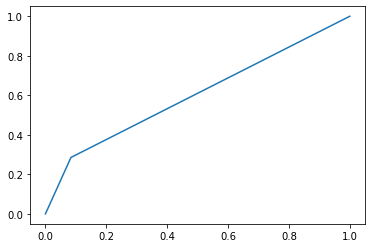

In [47]:
from sklearn.metrics import roc_curve
fpr1, tpr1, thresholds = roc_curve(y_test, lor_c.predict(X1_test), pos_label=1)
plt.plot(fpr1,tpr1)

<AxesSubplot:xlabel='no_of_special_requests', ylabel='nights'>

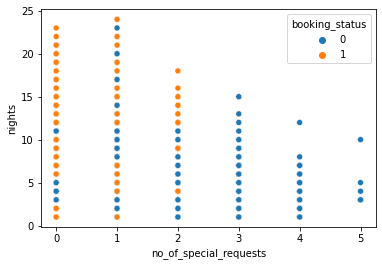

In [48]:
#sns.pairplot(hr)
sns.scatterplot(data=hr,x=hr['no_of_special_requests'],y=hr['nights'], hue=hr['booking_status'])

<AxesSubplot:xlabel='no_of_special_requests', ylabel='avg_price_per_room'>

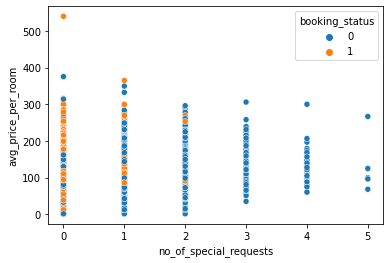

In [49]:
sns.scatterplot(data=hr,x=hr['no_of_special_requests'],y=hr['avg_price_per_room'], hue=hr['booking_status'])

Conclusion: more booking nights, more guests in the room, higher room rate and less guest request 
            cause high possibility to cancellation

Suggestion: 1. Send guest request email after receiving booking confirmation

          2. Change different room type price based on the prediction model

          3. Limit number of guests per room 